In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pickle
pd.set_option('display.max_columns', 500)

In [3]:
with open('/kaggle/input/fashion-dataset-processed/styles-668955cf.pkl', 'rb') as f:
    styles = pickle.load(f)
styles.head()

,id,price,discountedPrice,styleType,productTypeId,articleNumber,visualTag,productDisplayName,variantName,myntraRating,catalogAddDate,brandName,ageGroup,gender,baseColour,colour1,colour2,fashionType,season,year,usage,vat,displayCategories,weight,navigationId,landingPageUrl,articleAttributes,brandUserProfile,codEnabled,styleImages,lookGoodAlbum,style360Images,masterCategory,subCategory,articleType,isEMIEnabled,productDescriptors,styleOptions,colours,discountData
0,1566,299,299,P,299,27144,,Artengo Men Black Cap,Black,10,1445524255,UNK,Adults-Men,Men,Black,NA,NA,Fashion,Summer,2011,Sports,5.5,"Sports Wear,Accessories,Sale",0,0,Caps/Artengo/Artengo-Men-Black-Cap/1566/buy,{},{},True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Accessories,Headwear,Caps,False,-,"[{'id': 4953, 'name': 'Size', 'value': 'JUNIOR...",NaN,NaN
1,39342,2199,2199,P,288,81SU292201,,Fila Men Zoom Black Shoes,ZOOM HI,0,1450346785,FILA,Adults-Men,Men,Black,Blue,White,Core,Summer,2012,Casual,14.5,Footwear,0,0,Casual-Shoes/FILA/Fila-Men-Zoom-Black-Shoes/39...,{'Type': 'Driving Shoes'},{'uidx': '608472c1.5659.4e09.848f.9e40608f461e...,True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Footwear,Shoes,Casual Shoes,True,<p><strong>Style Note</strong><br />A perfect ...,"[{'id': 157461, 'name': 'Size', 'value': 'UK4'...",{'colors': {'39341': {'dre_landing_page_url': ...,NaN
2,13182,2499,2499,P,288,1SB106XX010,,FILA Men Dls Maxim Black Sports Shoes,Dls Maxim,1,1456403163,FILA,Adults-Men,Men,Black,NA,NA,Fashion,Fall,2011,Sports,14.5,"Sports Shoes,Footwear",0,20,Sports-Shoes/FILA/FILA-Men-Dls-Maxim-Black-Spo...,{'Sport': 'Basketball'},{'uidx': '608472c1.5659.4e09.848f.9e40608f461e...,True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Footwear,Shoes,Sports Shoes,True,"<p style=""text-align: justify;"">Win those winn...","[{'id': 61037, 'name': 'Size', 'value': 'UK7',...",{'colors': {'13181': {'dre_landing_page_url': ...,NaN
3,21762,1695,1440,RTV,360,MB1212001,,Fossil Men Mead Black Belt,Mead,0,1449669445,Fossil,Adults-Men,Men,Black,,,Fashion,Fall,2011,Casual,14.5,Accessories,0,0,Belts/Fossil/Fossil-Men-Mead-Black-Belt/21762/buy,{},{'uidx': '49948113.c25f.4356.af4f.c937cf6d2523...,True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Accessories,Belts,Belts,True,"<p>Crafted from pure leather, this fossil belt...","[{'id': 98334, 'name': 'Size', 'value': '36', ...",NaN,"{'discountType': 1, 'discountAmount': 255, 'di..."
4,48692,1525,1509,P,416,EF8782,,Lucera Women Silver Earrings,Silver,1,1451098149,UNK,Adults-Women,Women,Silver,NA,NA,Fashion,Summer,2012,Casual,5.5,NaN,0,0,Earrings/Lucera/Lucera-Women-Silver-Earrings/4...,"{'Occasion': 'Western', 'Fine Jewellery': 'Fin...",{},True,{'default': {'imageURL': 'http://assets.myntas...,{},{},Accessories,Jewellery,Earrings,False,<p>Silver coloured earrings<br />An amber colo...,"[{'id': 189222, 'name': 'Size', 'value': 'Ones...",NaN,"{'discountType': 1, 'discountAmount': 16, 'dis..."


'id', 'price', 'ageGroup', 'baseColour', 'Season', 'Usage', 'masterCategory', 'subCategory', 'articleType'

In [4]:
embeddings = pd.read_parquet('/kaggle/input/fashion-dataset-processed/embeddings-efe5f026.parquet')
embeddings

,image,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,...,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,31973,-0.170323,-0.127229,-0.060187,-0.097278,-0.170910,-0.096029,-0.105873,-0.102704,-0.136221,-0.137162,-0.142986,0.216149,0.265434,0.428749,-0.006546,-0.210324,-0.209786,-0.164941,-0.082347,-0.167413,-0.118588,-0.153508,-0.148233,0.387841,0.824998,-0.179155,-0.199942,-0.154159,-0.006428,-0.174533,-0.132483,-0.205421,-0.196857,-0.160929,-0.169533,-0.180472,-0.109806,-0.170594,-0.211013,-0.205859,-0.191319,-0.196886,-0.145170,0.416465,-0.173608,-0.148758,-0.115018,-0.100876,-0.164438,-0.122696,-0.169489,0.206448,-0.063833,-0.123792,-0.191938,0.751727,-0.162400,0.428443,-0.063969,-0.157349,-0.024516,0.279404,-0.047787,-0.181833,-0.186209,-0.128927,-0.160144,0.790316,-0.185174,-0.137356,-0.197635,-0.163914,-0.109652,-0.053947,-0.156972,-0.182406,-0.143003,-0.157740,-0.190291,-0.124267,-0.048598,-0.084630,-0.135197,-0.194907,-0.109412,-0.159553,-0.088875,-0.215434,-0.177067,-0.156205,-0.174858,-0.197927,0.134350,-0.181188,-0.117957,0.218367,-0.178150,-0.214281,-0.118142,-0.099488,-0.188613,-0.037954,-0.117165,-0.127566,0.232271,-0.152405,-0.145512,-0.059477,0.011861,-0.213394,-0.092671,-0.159573,-0.095813,-0.224835,-0.098818,-0.102746,-0.084198,-0.160276,-0.115990,-0.195369,-0.210835,-0.074017,-0.112559,-0.082036,-0.124785,0.017905,-0.177004,-0.171601,-0.166924,0.077727,0.353032,-0.083871,0.600624,-0.023768,-0.150680,-0.192287,-0.135444,-0.092877,-0.109332,-0.160612,0.516932,-0.203249,-0.111666,-0.086618,-0.062338,-0.221449,-0.158931,-0.189163,-0.115718,-0.132683,-0.174690,-0.172770,-0.202529,-0.104090,-0.174077,-0.147984,0.269128,-0.158485,-0.220811,-0.209511,-0.220551,-0.181972,-0.196700,-0.120896,-0.063478,-0.060119,-0.075209,-0.118093,-0.162197,-0.175515,0.630142,-0.164862,-0.176824,-0.174265,-0.196709,0.359590,-0.116301,-0.143198,-0.174438,-0.199633,-0.183630,-0.236100,-0.139010,-0.116582,-0.219968,-0.191806,-0.17096

In [5]:
leftCols = ['id', 'price', 'ageGroup', 'baseColour', 'season', 'usage', 'masterCategory', 'subCategory', 'articleType']

In [6]:
df = pd.merge(left=styles[leftCols],
              right=embeddings,
              how='left',
              left_on='id',
              right_on='image',
              suffixes=('', ''))

In [7]:
df = df.drop('image', axis=1)
df.head()

,id,price,ageGroup,baseColour,season,usage,masterCategory,subCategory,articleType,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,...,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,1566,299,Adults-Men,Black,Summer,Sports,Accessories,Headwear,Caps,-0.118222,0.030316,0.122064,-0.200130,-0.129380,0.015641,-0.216125,-0.065444,0.386859,-0.108395,-0.138889,0.056681,0.005707,0.215734,-0.084552,-0.036854,-0.043433,0.615092,-0.124184,-0.026212,0.127562,0.104480,-0.022466,1.232915,-0.164397,0.056320,-0.141906,-0.092354,-0.167138,0.946693,-0.154703,-0.036546,-0.193834,0.046372,0.226949,0.065027,0.161560,-0.079296,-0.138048,0.639143,-0.054287,0.962557,0.369781,-0.188308,-0.132670,-0.075776,-0.146451,-0.063611,-0.130101,-0.193951,-0.140488,-0.022209,-0.120496,-0.097856,-0.211153,-0.159724,-0.089420,0.001875,0.057550,1.021938,0.150622,-0.197519,0.110686,-0.176196,-0.014667,-0.050956,-0.195611,0.060780,0.511932,-0.060666,1.540157,0.083841,-0.188666,-0.102921,-0.148011,0.297278,-0.147775,-0.212455,-0.139989,-0.180136,0.124334,-0.100833,-0.189774,-0.147861,-0.137109,-0.107873,0.503271,-0.120271,-0.061284,0.457749,-0.136616,0.256579,0.529084,-0.109268,-0.033913,0.154943,0.500342,-0.062604,-0.169122,0.021952,0.170764,0.129977,0.311516,0.177151,1.558732,-0.050534,-0.141910,-0.119464,0.179265,-0.182365,-0.115783,0.115027,-0.041457,0.083761,-0.032435,-0.080219,-0.064233,-0.209991,1.053148,-0.083656,-0.032501,-0.189271,-0.044954,-0.028387,1.530055,0.057535,0.099609,-0.122896,0.421660,-0.127117,-0.159927,1.741053,-0.156933,0.499418,1.683513,-0.077568,-0.043220,0.053050,-0.037517,-0.152052,-0.085314,-0.099562,-0.165257,-0.044939,0.013060,-0.120754,0.034030,-0.208772,-0.114111,-0.080618,-0.165051,-0.153027,-0.002097,-0.075953,0.295827,-0.107585,-0.214240,0.836045,-0.160829,0.100636,0.687922,0.199004,-0.168113,0.076457,-0.064835,-0.061133,0.046202,0.384555,0.169442,-0.173167,-0.143198,0.321572,-0.207695,-0.140406,0.057268,0.405684,-0.112685,0.167366,-0.052725,-0.160530,-0.126782,-0

In [8]:
df.ageGroup.unique()

['Adults-Men', 'Adults-Women', 'Kids-Girls', 'Adults-Unisex', 'Kids-Boys', 'Kids-Unisex', '']
Categories (7, object): ['', 'Adults-Men', 'Adults-Unisex', 'Adults-Women', 'Kids-Boys', 'Kids-Girls', 'Kids-Unisex']

In [46]:
df.articleType.nunique(), df.subCategory.nunique(), df.masterCategory.unique()

(143,
 45,
 ['Accessories', 'Footwear', 'Apparel', 'Personal Care', 'Sporting Goods', 'Free Items', 'Home']
 Categories (7, object): ['Accessories', 'Apparel', 'Footwear', 'Free Items', 'Home', 'Personal Care', 'Sporting Goods'])

In [45]:
df.usage.unique()

array(['Sports', 'Casual', 'Party', 'Formal', 'Ethnic', 'Smart Casual',
       'NA', 'Travel', 'Home', ''], dtype=object)

In [56]:
df.shape

(44446, 1289)

In [85]:
df = df[df.masterCategory != 'Home']
df.masterCategory = df.masterCategory.astype('str').astype('category')
df.shape

(44445, 1289)

In [107]:
df.masterCategory.value_counts()

Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Name: masterCategory, dtype: int64

In [86]:
df['usage'] = df['usage'].astype('category')
df.price = df.price.astype('int')

In [87]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [101]:
xgbc = xgb.XGBClassifier(enable_categorical=True,
                         tree_method='hist')

X = df.drop(['masterCategory', 'subCategory', 'articleType', 'id'], axis=1)
y = df.masterCategory.astype('category').cat.codes

In [102]:
y.value_counts()

1    21400
0    11289
2     9222
4     2404
3      105
5       25
dtype: int64

In [103]:
X_tr, X_t, y_tr, y_t = train_test_split(X, y, stratify=y, test_size=.2)

In [104]:
from sklearn.metrics import classification_report

In [105]:
# dataMatrix = xgb.DMatrix(X_tr, y_tr,
#                          enable_categorical=True)

In [106]:
xgbc.fit(X_tr, y_tr)

y_pred = xgbc.predict(X_t)
print(classification_report(y_t, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2258
           1       1.00      1.00      1.00      4280
           2       1.00      1.00      1.00      1844
           3       0.67      0.10      0.17        21
           4       0.99      1.00      1.00       481
           5       1.00      1.00      1.00         5

    accuracy                           1.00      8889
   macro avg       0.94      0.85      0.86      8889
weighted avg       0.99      1.00      0.99      8889



In [108]:
df[df.masterCategory == 'Free Items'].id

1176     36763
1713     52676
2043     44968
2406     36777
2606     49717
         ...  
42155    53566
42602    28353
42615    49706
43521    53592
44213    29448
Name: id, Length: 105, dtype: object

In [109]:
from PIL import Image

In [110]:
sample = df[df.masterCategory == 'Free Items'].sample(5).id

In [112]:
INPUT_PATH = '/kaggle/input/fashion-product-images-dataset/fashion-dataset/images'

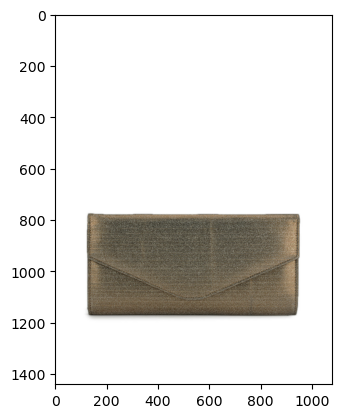

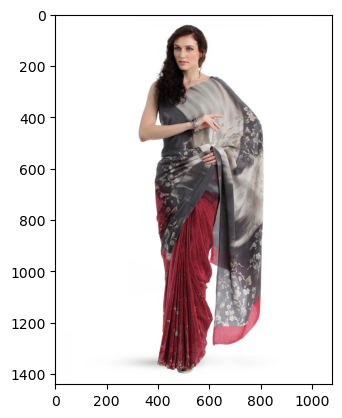

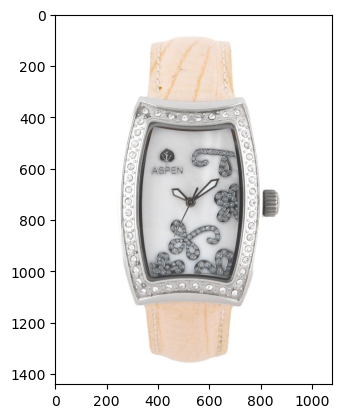

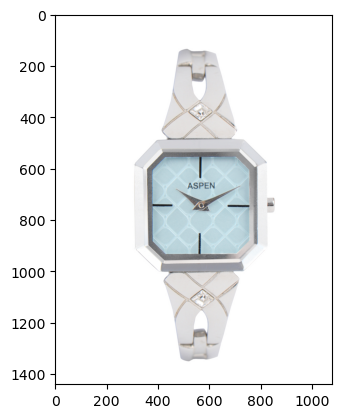

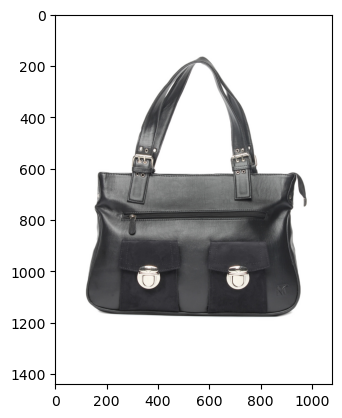

In [113]:
for s in sample:
    plt.imshow(Image.open(f'{INPUT_PATH}/{s}.jpg'))
    plt.show()

In [115]:
df.subCategory.value_counts()

Topwear                     15405
Shoes                        7344
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1080
Eyewear                      1073
Fragrance                    1012
Sandal                        963
Wallets                       933
Flip Flops                    915
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   143
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Skin          

In [116]:
df = df[~df.subCategory.isin(['Vouchers'])]
df.subCategory = df.subCategory.astype('str').astype('category')

/tmp/ipykernel_32/2267048652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.subCategory = df.subCategory.astype('str').astype('category')


In [ ]:
X = df.drop(['masterCategory', 'subCategory', 'articleType', 'id'], axis=1)
y = df.subCategory.cat.codes

X_tr, X_t, y_tr, y_t = train_test_split(X, y, stratify=y, test_size=.2)

xgbc = xgb.XGBClassifier(enable_categorical=True,
                         tree_method='hist')
xgbc.fit(X_tr, y_tr)

In [121]:
y_pred = xgbc.predict(X_t)
print(classification_report(y_t, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.8966    0.9455        29
           1     0.8889    0.7619    0.8205        21
           2     0.9772    0.9820    0.9796       611
           3     0.0000    0.0000    0.0000         2
           4     0.0000    0.0000    0.0000         1
           5     0.9818    1.0000    0.9908       162
           6     0.9494    0.9740    0.9615       539
           7     0.9444    0.7727    0.8500        22
           8     0.8082    0.6146    0.6982        96
           9     0.8333    0.6250    0.7143         8
          10     0.9862    1.0000    0.9931       215
          11     0.8852    0.8852    0.8852       183
          12     0.9381    0.9752    0.9563       202
          13     0.5000    0.0476    0.0870        21
          14     1.0000    0.2500    0.4000         4
          15     1.0000    0.7500    0.8571         4
          16     0.9455    0.8814    0.9123        59
          17     0.9776    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

In [122]:
df.subCategory.value_counts()

Topwear                     15405
Shoes                        7344
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1080
Eyewear                      1073
Fragrance                    1012
Sandal                        963
Wallets                       933
Flip Flops                    915
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   143
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Skin          

In [125]:
y.value_counts().sort_index()

0       143
1       106
2      3055
3        12
4         4
5       811
6      2694
7       108
8       478
9        43
10     1073
11      915
12     1012
13      104
14       20
15       19
16      293
17     1808
18     1080
19      527
20      470
21      307
22       38
23      329
24        6
25      963
26      427
27      118
28       24
29     7344
30       69
31       77
32      698
33        3
34       21
35       90
36      258
37    15405
38        6
39      933
40     2542
41        7
42        4
dtype: int64